In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/people/people.csv", sep="\t")
df["oppstartsdato"] = pd.to_datetime(df["oppstartsdato"])
df.index.name = "ansattnr"
df.head()

,fornavn,etternavn,kjønn,addresse,oppstartsdato,ansvarsdag,epost,brukernavn,avdeling,senioritet,sertifisert,varslet
ansattnr,,,,,,,,,,,,
0,Astrid,Nilsen,hun,"Aasenbråten 1H, 2601 Jensodden",1980-06-18,fredag,tonehaug@hotmail.com,emma58,4,6,False,False
1,Karoline,Kristoffersen,hun,"Aunekollen 56, 1852 Ahmed",2013-01-12,lørdag,kjersti76@gmail.com,rhansen,4,3,True,False
2,Gunn,Hansen,hun,"Solheimhavna 968, 7337 Janborg",2002-12-22,søndag,teliassen@yahoo.com,alfstrand,1,3,False,True
3,Mette,Haug,hun,"Pettersenflata 4, 5354 Nguyen",2018-08-12,fredag,uhauge@hotmail.com,skristensen,2,5,False,False
4,Heidi,Rønning,hun,"Jacobsenkroken 93, 0991 Larsen",1987-03-26,onsdag,xhalvorsen@hotmail.com,helgekristensen,3,6,False,False


In [3]:
# Run this cell
# This will give our employees a salary
import numpy as np
dfsort = df.sort_values(["senioritet", "oppstartsdato", "avdeling"], ascending=[True, False, False])
payroll = pd.Series([400000+2000*i for i in range(100)], index=dfsort.index)
payroll += np.random.randint(
    0, 10000, size=len(payroll))
payroll.name = "lønn"
df = df.join(payroll)

## Selection

In [538]:
# Hi!
# I am your boss here at Company Ltd, Torgrim Ruud.
# You can call me Mr. Ruud, or you can be fired.

# People here at the office don't appreciate that I give my family preferential treatment.
# But what is so wrong with nepotism? The apple rarely falls far from the tree, am I right?

# Task:
# Provide me a list of emails (and names) that share my last name, so that I can send them some shares.
df.loc[df.etternavn == "Ruud", ["fornavn", "etternavn", "epost"]]

,fornavn,etternavn,epost
ansattnr,,,
86,Tommy,Ruud,larsarnesen@gmail.com
98,Lise,Ruud,xberntsen@gmail.com


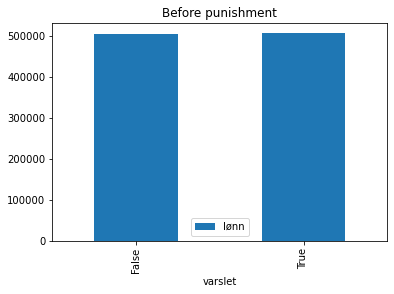

In [16]:
# Complaining is never good! I have sent out a varsel to everyone who answered negatively on our HR survey.
# Staff who has received a varsel should be taught a message. Give them a 20% pay cut!

# You can use this graph to check if your salary slash was successful.
# Write your solution (salary slash code) in the next cell
df.groupby("varslet").lønn.mean().plot(kind="bar", legend=True, title="Before punishment");

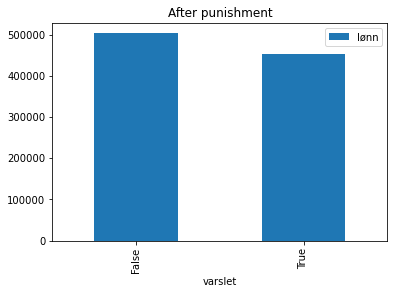

In [17]:
# Salary slash code code goes here!
df.loc[df.varslet == True, "lønn"] *= 0.9

# Plotting to check if it worked
df.groupby("varslet").lønn.mean().plot(kind="bar", legend=True, title="After punishment");

In [306]:
# My birthday is on November 19th and I want to keep the attention on me. I want you to find those selfish people 
# who decided to have their work anniversary on my special day.. And get rid of them! 

# (He first wants you to find people with oppstartsdato the same date as him)

selfish = df.loc[(df.oppstartsdato.dt.month == 11) & (df.oppstartsdato.dt.day == 19)]
selfish

,fornavn,etternavn,kjønn,addresse,oppstartsdato,ansvarsdag,epost,brukernavn,avdeling,senioritet,sertifisert,varslet,ansatt


In [305]:
# (Then he wants you to lay them off, i.e. drop them from our dataframe)

df.drop(selfish.index, inplace=True)

,fornavn,etternavn,kjønn,addresse,oppstartsdato,ansvarsdag,epost,brukernavn,avdeling,senioritet,sertifisert,varslet,ansatt
69,Einar,Thorsen,han,"Fredrikseneggen 8C, 1053 Rønning",2007-11-19,torsdag,hanneknutsen@yahoo.com,julievik,3,1,False,False,False
72,Øystein,Nygård,han,"Bakkeskrenten 89, 8063 Steinstrøm",2020-11-19,søndag,gunnar76@gmail.com,sissel49,1,1,False,False,False


In [482]:
# I don't want my underlings snooping into my personal business at home. I have plenty of things to hide!
# I live at "3769 Kristinhamn" and if any staff lives there, give them the boot!

snoopers = df[df.addresse.str.contains("3769 Kristinhamn")]
print(snoopers[["fornavn", "etternavn", "addresse"]])
df.drop(snoopers.index, inplace=True)

         fornavn  etternavn                          addresse
ansattnr                                                     
89        Sigurd  Myklebust  Hagenstien 752, 3769 Kristinhamn


In [240]:
df[df.etternavn.duplicated()]#.sort_values("etternavn")
df[df.etternavn.duplicated(keep=False)].etternavn.sort_values()
#df[df.etternavn == "Moe"]

99    Andreassen
87    Andreassen
14    Andreassen
49      Antonsen
26      Antonsen
         ...    
75        Strand
53         Strøm
28         Strøm
59     Thomassen
29     Thomassen
Name: etternavn, Length: 69, dtype: object

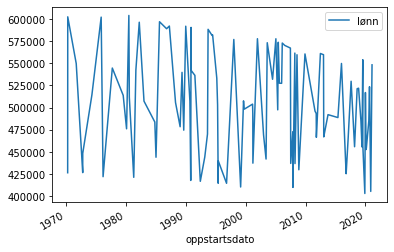

In [533]:
# Plot lønn (y) as a function of oppstartsdato (x)
df.plot(y="lønn", x="oppstartsdato");

         oppstartsdato    lønn
ansattnr                      
6           1970-03-28  426452
60          1970-04-02  602350
44          1971-09-01  549672
93          1972-10-02  426576
10          1972-10-03  448330


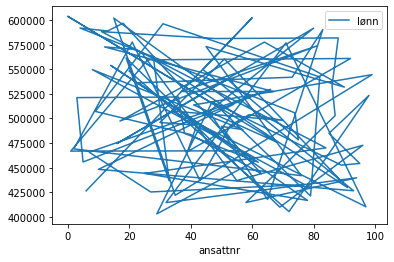

In [536]:
# Why does this not work the same as the cell above?
# Here we try to sort the values first, then plot without using y="oppstartsdato"
df_sorted = df.sort_values("oppstartsdato")

# When we print the dataframe, it sure looks like the rows are sorted by oppstartsdato!
print(df_sorted[["oppstartsdato", "lønn"]].head())

# Then why does the plot look like a Picasso painting?
df_sorted.plot(y="lønn");

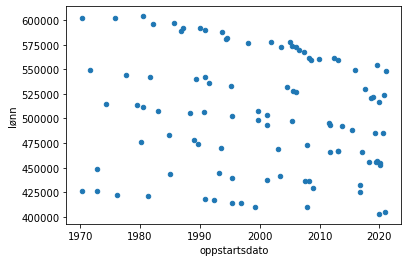

In [535]:
# Try to the lønn again (against oppstartsdato), but use a scatter plot this time
df.plot(kind="scatter", y="lønn", x="oppstartsdato");

Regression curve Starting year:  
-640.9 x + 1.786e+06
Regression curve Seniority:  
3.263e+04 x + 3.747e+05


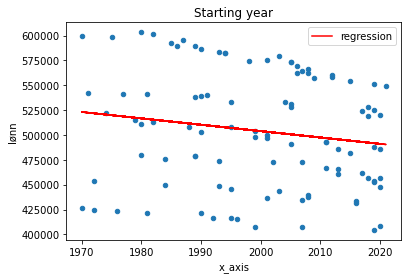

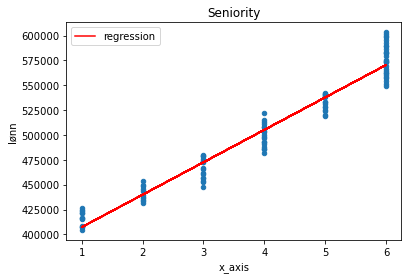

In [471]:
# This cell showcases two things:
# 1. that you can make a regression curve using numpy
# 2. that you can have multiple plots in a single "box"

# Don't feel the need to understand this code by the way.
# For now you can just run it with a few 

import numpy as np

def regr(df, x_axis, title=""):
    """
    Plots a linear regression line of "lønn" column based on x_axis
    """
    df = df.copy()
    df["x_axis"] = x_axis
    
    # Finding the linear regression line (ax + b)
    d = np.polyfit(df["x_axis"], df.lønn, 1)
    f = np.poly1d(d)

    print(f"Regression curve {title}: {f}")
    
    regression = f(df["x_axis"])

    df = df.assign(regression=regression)
    
    # Two plots in one box
    ax = df.plot(kind="scatter", y='lønn', x="x_axis", title=title)
    df.plot(y='regression', x="x_axis", color='Red', ax=ax);
    

regr(df, df.oppstartsdato.dt.year, "Starting year")
regr(df, df.senioritet, "Seniority")

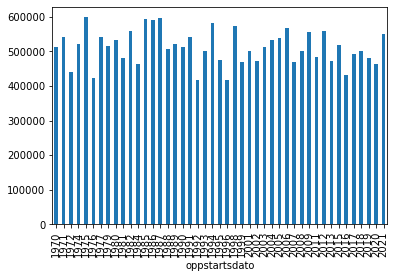

In [466]:
df.groupby(df.oppstartsdato.dt.year).lønn.mean().plot(kind="bar");

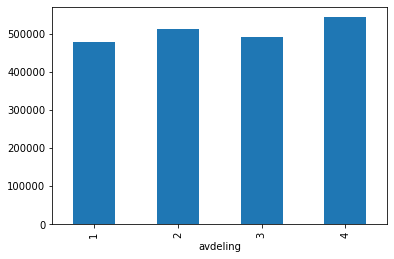

In [473]:
# Using groupby, plot the average salary (lønn) as a bar chart for each department (avdeling)

df.groupby("avdeling").lønn.mean().plot(kind="bar");

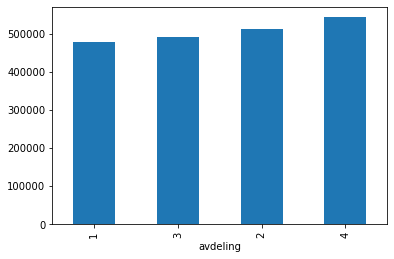

In [476]:
# Are you able to plot it again, but with the bars sorted by height?

df.groupby("avdeling").lønn.mean().sort_values().plot(kind="bar");

# Groupby

In [174]:
# On Saturdays, all attendes must be without a varsel
# use Grouper.get_group()
gr = df.groupby("ansvarsdag")
gr.get_group("lørdag").varslet.any()

True

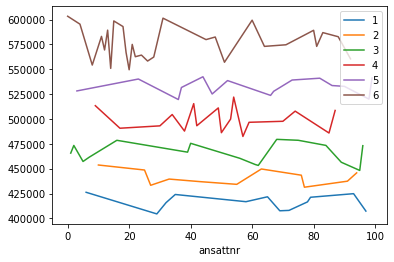

In [483]:
# Plot lønn by senioritet (one line for each senioritet)
# Use df.groupby()
# Hint: when plotting, use legend=True
df.groupby("senioritet").lønn.plot(legend=True);

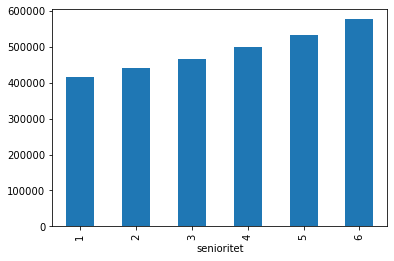

In [484]:
df.groupby("senioritet").lønn.mean().plot(kind="bar");

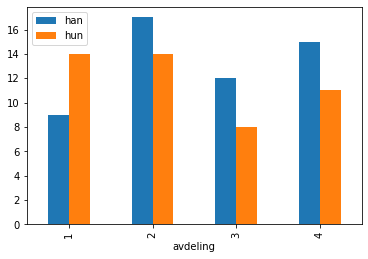

In [155]:
# Challenging

# Plot distribution of genders by avdeling
# Docs: https://pandas.pydata.org/docs/user_guide/reshaping.html#combining-with-stats-and-groupby
gr.apply(lambda group: group.kjønn.value_counts()).unstack().plot(kind="bar");

In [238]:
# Average seniority for every department must be over 3.0
df.groupby("avdeling").senioritet.mean()

avdeling
1    3.083333
2    4.368421
3    3.588235
4    5.130435
Name: senioritet, dtype: float64

In [157]:
# There must be at least 1 sertified person for each ansvarsdag
df.groupby("avdeling").sertifisert.sum()

avdeling
1    3.0
2    5.0
3    2.0
4    8.0
Name: sertifisert, dtype: float64

In [171]:
# grouping by year started, find the last person to start for each year
latest = df.groupby(df.oppstartsdato.dt.year).oppstartsdato.idxmin()
df.loc[latest, ["fornavn", "etternavn", "oppstartsdato"]]

,fornavn,etternavn,oppstartsdato
50,Andrea,Thorsen,1970-03-04
23,Eirik,Rønning,1971-03-26
88,Frank,Aasen,1972-02-04
48,Eva,Andersen,1973-08-15
22,Maria,Ali,1974-02-14
3,Berit,Haugland,1975-04-03
43,Marianne,Strøm,1976-05-30
80,Arne,Hanssen,1977-04-29
51,Lise,Moe,1978-01-03
28,John,Isaksen,1979-05-16


In [118]:
# every avdeling must have at least one person with max seniority (6).
df.groupby(df.avdeling).senioritet.max() >= 6

avdeling
1    True
2    True
3    True
4    True
Name: senioritet, dtype: bool

In [119]:
# every seniority in a given avdeling must have at least one person who is certified.
df.groupby([df.avdeling, df.senioritet]).sertifisert.sum() >= 1

avdeling  senioritet
1         1             False
          2              True
          3             False
          4              True
          5              True
          6             False
2         1             False
          2             False
          3              True
          4             False
          5             False
          6              True
3         1             False
          2              True
          3              True
          4             False
          5             False
          6             False
4         1              True
          2             False
          3             False
          4              True
          5              True
          6              True
Name: sertifisert, dtype: bool

In [172]:
# Within each department, the man and woman who has stayed the longest with the Company shall receive an annual price.
# make a list of people to celebrate for this years party.
longest = df.groupby(["avdeling", "kjønn"]).oppstartsdato.idxmin()
df.loc[longest.values, ["fornavn", "etternavn", "oppstartsdato"]]

,fornavn,etternavn,oppstartsdato
88,Frank,Aasen,1972-02-04
59,Maren,Andreassen,1970-12-01
23,Eirik,Rønning,1971-03-26
50,Andrea,Thorsen,1970-03-04
83,Eivind,Abrahamsen,1980-05-23
85,Berit,Thorsen,1971-08-24
45,Jørgen,Thomassen,1974-11-12
9,Rita,Strand,1975-09-22


In [215]:
# Using Grouper.apply(), find the average senioritet for each avdeling.
df.groupby("avdeling").apply(lambda group: group.senioritet.mean())

avdeling
1    3.652174
2    3.838710
3    3.200000
4    3.807692
dtype: float64

In [213]:
# For every seniority level at least one person must have the number "1" in their brukernavn
# Use Grouper.apply()
df.groupby("senioritet").apply(lambda group: group.brukernavn.str.contains("1").any())

senioritet
1     True
2    False
3     True
4     True
5    False
6     True
dtype: bool

In [130]:
# Challenging
# every ansvarsdag must have at least one person who has stayed in the company for 3 years or longer.
(pd.Timestamp.now() - df.groupby(df.ansvarsdag).oppstartsdato.max()).dt.days / 365

ansvarsdag
fredag      4.816438
lørdag      5.375342
mandag      6.575342
onsdag      4.649315
søndag      0.432877
tirsdag    14.186301
torsdag     0.284932
Name: oppstartsdato, dtype: float64

In [184]:
# Challenging
# No avdeling is allowed to employ people who share last names (because it causes our computer system to crash!)
# use Grouper.apply
df.groupby("avdeling").apply(lambda group: group[group.etternavn.duplicated(keep=False)])

fornavn etternavn kjønn                             addresse  \
avdeling                                                                     
1        14       Ole  Andersen   han    Johannessenspranget 11A, 1249 Lie   
         22     Maria       Ali   hun           Alirøa 91, 9021 Steinarvåg   
         48       Eva  Andersen   hun      Halvorsenbakken 55, 1070 Tornes   
         49  Kristian       Ali   han     Jakobsenbakken 3, 0856 Mariusdal   
2        16       Kim     Berge   han         Nielsenåsen 771, 0569 Sæther   
         23     Eirik   Rønning   han         Paulsenbråten 11, 5848 Strøm   
         47      Emma    Nygård   hun    Jenssengjerdet 3C, 6485 Camillaby   
         57   Andreas    Nygård   han          Aaslunden 54, 8540 Vildedal   
         74    Markus   Rønning   han      Jenssenmyra 48C, 0321 Elingrunn   
         99     Trond     Berge   han      Hanssenstien 2, 8875 Markushamn   
3        4      Silje    Bakken   hun      Mikkelsentunet 2, 8483 Andresen   
         11      Rita   Johnsen   hun          Jenssenskogen 41, 8113 Aune   
         42     Terje  Svendsen   han      Ahmedvollen 11, 8497 Rogergrunn   
         73      Leif  Svendsen   han  Jørgensenengen 05, 4940 Tommystrand   
         77    Sigrid    Bakken   hun   Christensenstubben 556, 0367 Berge   
         87      Erik   Johnsen   han            Tangenhavna 2, 7881 Bakke   
4        12       Ole       Lie   han      Christensenalléen 95, 5120 Aune   
         17     Marit    Madsen   hun       Solberghagen 03E, 2997 Johnsen   
         27     Turid       Lie   hun            Bøetoppen 43, 6169 Nguyen   
         58       Åse    Madsen   hun       Tangenstranda 4, 3685 Johansen   

            oppstartsdato ansvarsdag                       epost  \
avdeling                                                           
1        14    2008-11-06    tirsdag    myklebustterje@yahoo.com   
         22    1974-02-14     lørdag       zabrahamsen@yahoo.com   
         48    1973-08-15     søndag  haakonabrahamsen@yahoo.com   
         49    2008-12-29     mandag           stangen@gmail.com   
2        16    2001-09-02     onsdag            maasen@yahoo.com   
         23    1971-03-26    tirsdag          liehanne@yahoo.com   
         47    2018-03-19     fredag    mariannebrekke@yahoo.com   
         57    1979-11-24     mandag       fredrik47@hotmail.com   
         74    2016-05-05    torsdag            gahmed@gmail.com   
         99    2017-12-21     onsdag     tomabrahamsen@yahoo.com   
3        4     2007-05-02     lørdag  knutsenmartine@hotmail.com   
         11    2015-02-19     fredag     naesskristine@yahoo.com   
         42    2012-06-17    torsdag           finnvik@gmail.com   
         73    1990-10-16     lørdag    vildemikkelsen@gmail.com   
         77    2019-07-30     søndag         eidemaria@gmail.com   
         87    1995-12-17    torsdag      johnsentrine@gmail.com   
4        12    1995-12-25     lørdag   naesscathrine@hotmail.com   
         17    1989-04-21     søndag      liensigrid@hotmail.com   
         27    1980-09-28     lørdag        rthomassen@gmail.com   
         58    2016-06-29     lørdag             ihaug@gmail.com   

                  brukernavn  avdeling  senioritet  sertifisert  varslet  
avdeling                                                                  
1        14     myklebustaud         1           4         True    False  
         22            odd19         1           1        False     True  
         48          linda68         1           5        False    False  
         49          roger49         1           4        False    False  
2        16   joergensenroar         2           5        False    False  
         23            aud01         2           1        False    False  
         47        lundtonje         2           6         True    False  
         57          elise05         2           4        False    False  
         74         gthorsen         2           5